# Hindmarsh-Rose model

parameters is set to firing mode <irregular_bursting>


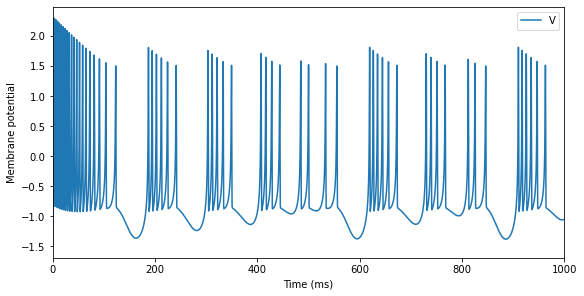

In [1]:
# -*- coding: utf-8 -*-

import brainpy as bp
import brainpy.numpy as np
import bpmodels
import matplotlib.pyplot as plt

# set global params
dt = 0.02  # update variables per <dt> ms
bp.profile.set(backend="numba", dt=dt, merge_steps=True)
mode = 'irregular_bursting'
param= {'quiescence':         [1.0, 2.0],  #a
        'spiking':            [3.5, 5.0],  #c
        'bursting':           [2.5, 3.0],  #d
        'irregular_spiking':  [2.95, 3.3], #h
        'irregular_bursting': [2.8, 3.7],  #g
        }  #params of b and I_ext corresponding to different firing mode
print(f"parameters is set to firing mode <{mode}>")

# define neuron type
HindmarshRose_neuron = bpmodels.neurons.get_HindmarshRose()

# build neuron group
neu = bp.NeuGroup(HindmarshRose_neuron, geometry=(10,), monitors=['V', 'y', 'z'])
neu.runner.set_schedule(['input', 'update', 'monitor', 'reset'])
neu.pars['b'] = param[mode][0]

# create input
current, pos_dur = bp.inputs.constant_current([(param[mode][1], 1000.)])

# simulate
neu.run(duration=pos_dur, inputs=["ST.input", current], report=False)

# paint
ts = neu.mon.ts
fig, gs = bp.visualize.get_figure(1, 1, 4, 8)
fig.add_subplot(gs[0, 0])
plt.plot(ts, neu.mon.V[:, 0], label = "V")
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential')
plt.xlim(-0.1, ts[-1] + 0.1)
plt.legend()
plt.show()